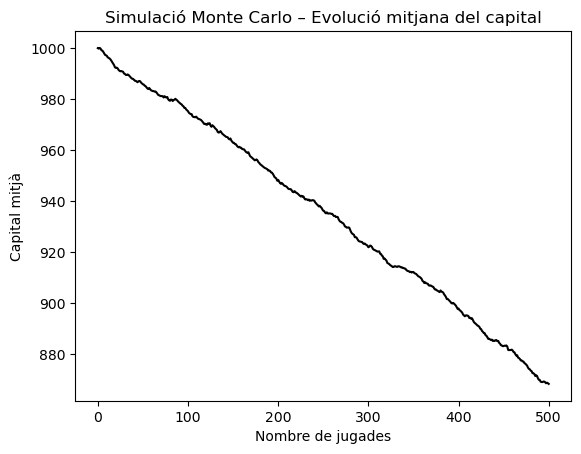

Percentatge de ruïna: 0.0 %
Capital mitjà final: 868.34


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Paràmetres globals de la simulació
# -------------------------------

B0 = 1000        # capital inicial del jugador
n = 500          # nombre màxim de jugades per simulació
N = 1000         # nombre de simulacions independents
b = 10           # aposta fixa a cada jugada (bi = b)

# Probabilitats ruleta europea (aposta al vermell)
p_guanyar = 18 / 37
p_perdre = 19 / 37

# -------------------------------
# Emmagatzematge de resultats
# -------------------------------

trajectories = []        # trajectòries del capital Bi
capitals_finals = []     # capital final Bn
ruina = []               # indicador de ruïna (1 si Bi ≤ 0)

# -------------------------------
# Simulació Monte Carlo
# -------------------------------

for sim in range(N):
    B = B0
    trajectoria = [B]

    for i in range(n):
        # Condició de ruïna
        if B <= 0:
            break

        # Variable aleatòria Xi
        Xi = np.random.choice([1, -1], p=[p_guanyar, p_perdre])

        # Evolució del capital
        B = B + b * Xi
        trajectoria.append(B)

    trajectories.append(trajectoria)
    capitals_finals.append(B)
    ruina.append(1 if B <= 0 else 0)

# -------------------------------
# Processament de resultats
# -------------------------------

# Unifiquem longituds per calcular la mitjana
max_len = max(len(t) for t in trajectories)
trajectories_padded = np.array([
    t + [np.nan] * (max_len - len(t)) for t in trajectories
])

# Trajectòria mitjana del capital
capital_mitja = np.nanmean(trajectories_padded, axis=0)

# -------------------------------
# Gràfic
# -------------------------------

plt.figure()
plt.plot(capital_mitja, color='black')
plt.xlabel("Nombre de jugades")
plt.ylabel("Capital mitjà")
plt.title("Simulació Monte Carlo – Evolució mitjana del capital")
plt.show()

# -------------------------------
# Resultats numèrics
# -------------------------------

percentatge_ruina = 100 * sum(ruina) / N
capital_mitja_final = np.mean(capitals_finals)

print("Percentatge de ruïna:", percentatge_ruina, "%")
print("Capital mitjà final:", capital_mitja_final)
